## Data Preparation

### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import dicom2nifti
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import nibabel as nib

### Importing just one patient's MRI results

In [ ]:
control_032057_nii_file_path = "Taowu_version-1.0/Taowu_version-1.0/taowu/sub-control032057/anat/sub-control032057_T1w.nii.gz"
nii_img = nib.load(control_032057_nii_file_path)
print(type(nii_img))
print(nii_img.header)

In [33]:
control_032057_data_array = nii_img.get_fdata()
print(type(control_032057_data_array))
print(control_032057_data_array.shape)

<class 'numpy.ndarray'>
(176, 188, 200)


### Visualize one patient's MRI results

#### Just one slice

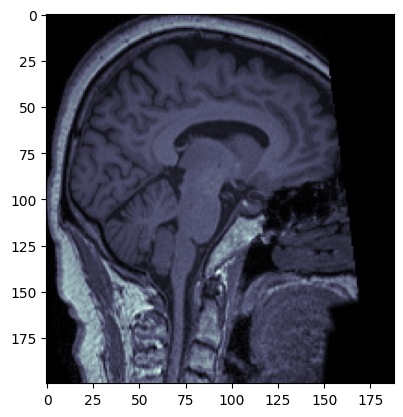

In [55]:
plt.imshow(ndi.rotate(control_032057_data_array[96], 90), cmap='bone')
plt.show()

#### Plotting series of slices

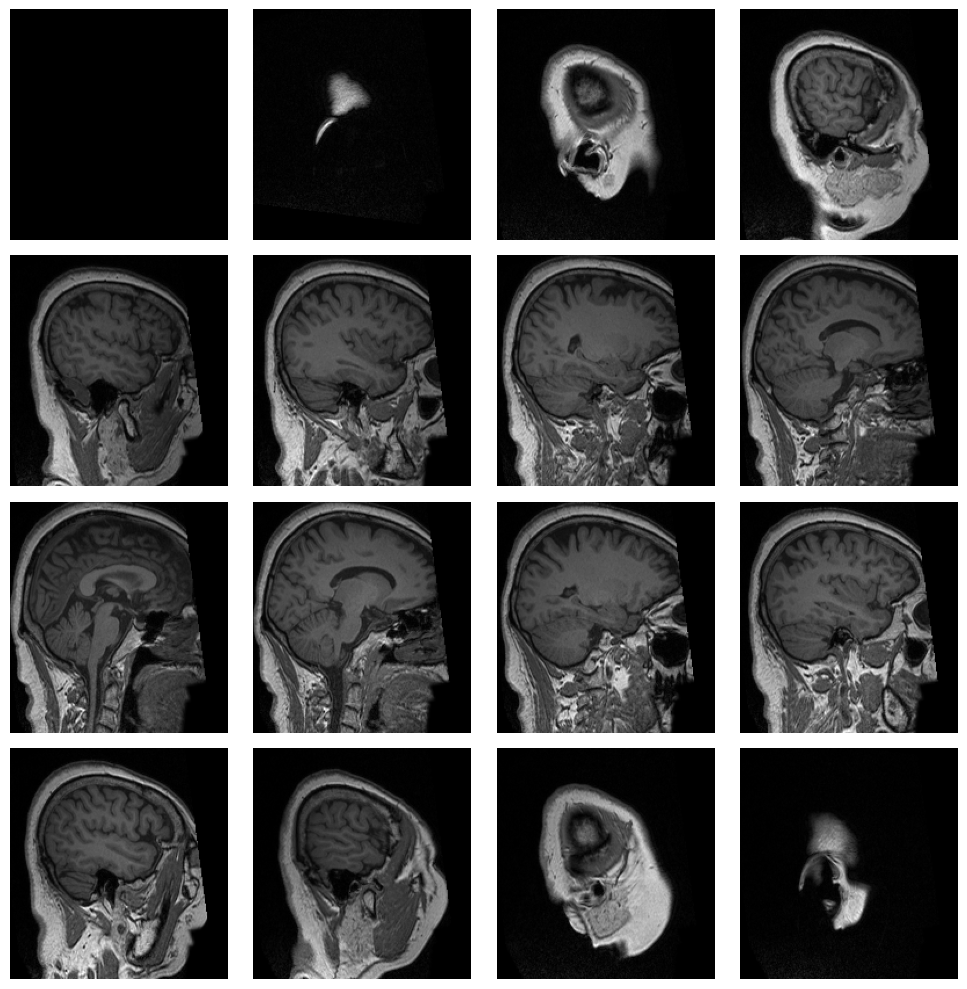

In [61]:
fig_rows = 4
fig_columns = 4
subplot_size = fig_rows * fig_columns
first_dimension_size = control_032057_data_array.shape[0]
step_size = first_dimension_size // subplot_size

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img, in enumerate(range(0, first_dimension_size, step_size)):
    axs.flat[idx].imshow(ndi.rotate(control_032057_data_array[img, :, :], 90), cmap = 'gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

#### Plotting series of slices

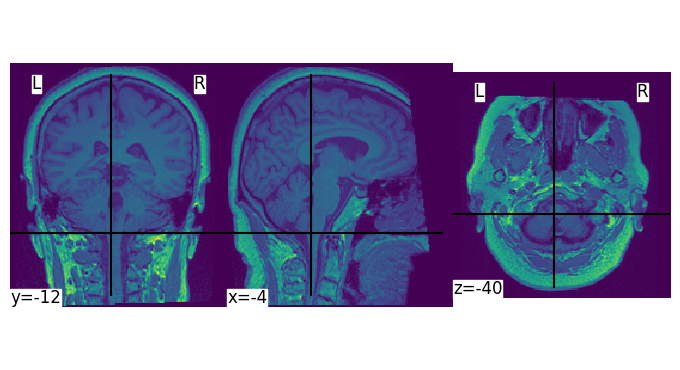

In [62]:
from nilearn import plotting

plotting.plot_img(nii_img)

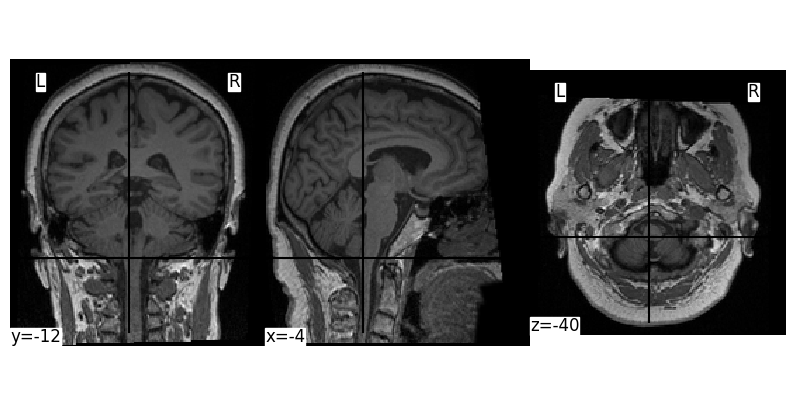

In [63]:
fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(nii_img, cmap='gray', axes=ax)
plt.show()

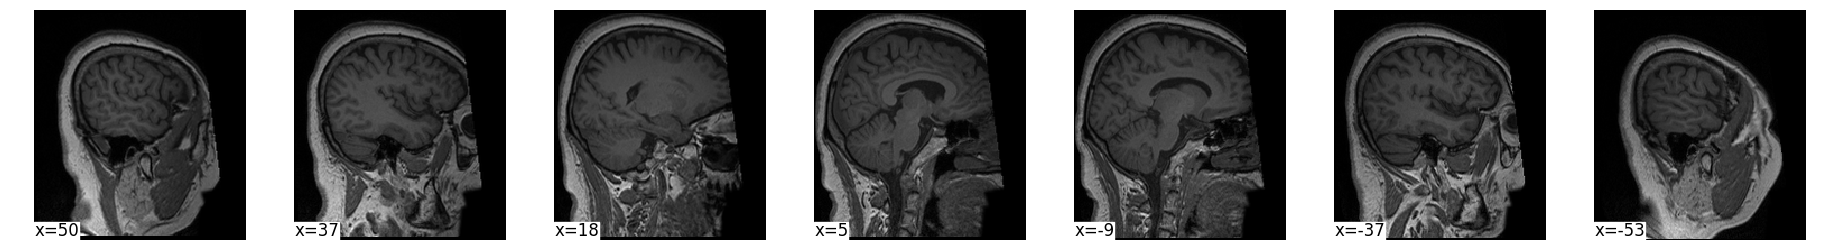

In [65]:
plotting.plot_img(nii_img, display_mode='x', cmap='gray')
plt.show()

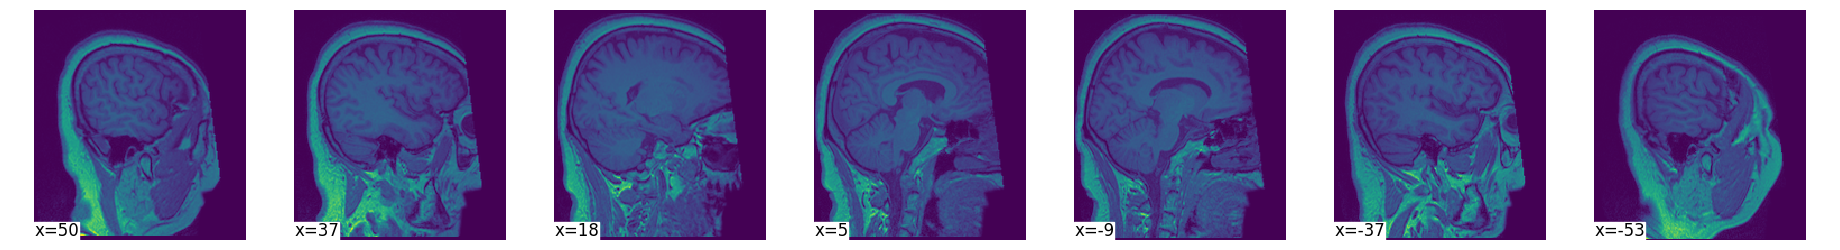

In [66]:
plotting.plot_img(nii_img, display_mode='x')
plt.show()

#### Applying smoothing gaussian filter

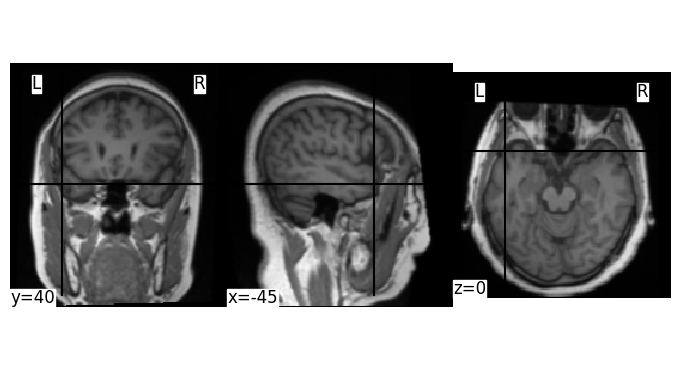

In [69]:
from nilearn import image
fwhm = 2

brain_vol_smth = image.smooth_img(nii_img, fwhm)
plotting.plot_img(brain_vol_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

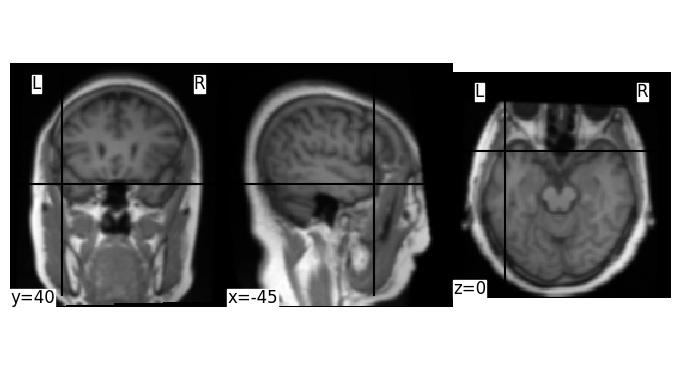

In [72]:
from nilearn import image
fwhm = 3

brain_vol_smth = image.smooth_img(nii_img, fwhm)
plotting.plot_img(brain_vol_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

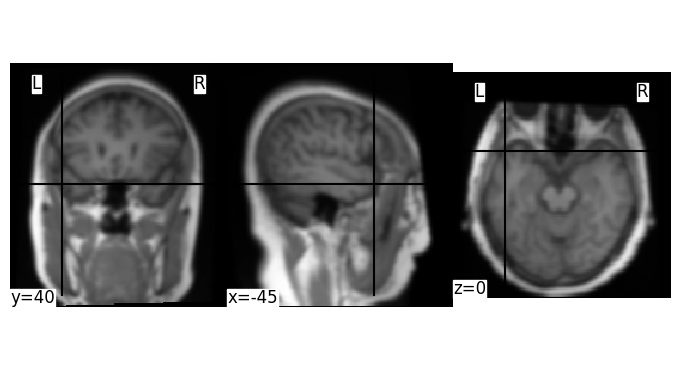

In [70]:
from nilearn import image
fwhm = 4

brain_vol_smth = image.smooth_img(nii_img, fwhm)
plotting.plot_img(brain_vol_smth, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

# ML testing without data preprocessing

In [ ]:
mask_filename = 